In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
#loading dataset
epex = pd.read_csv('epex_day_ahead_price.csv')
sip = pd.read_csv('spot_intraday_price.csv')
sysP = pd.read_csv('systemprice.csv')
epex.head()

,timestamp,apx_da_hourly
0,2019-03-31 23:00:00+00:00,26.43
1,2019-03-31 23:30:00+00:00,26.43
2,2019-04-01 00:00:00+00:00,29.24
3,2019-04-01 00:30:00+00:00,29.24
4,2019-04-01 01:00:00+00:00,35.10


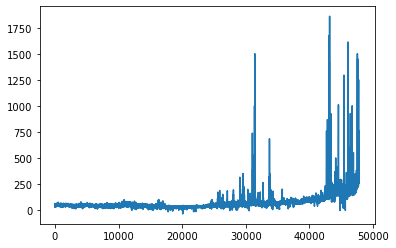

In [36]:
plt.plot(epex.apx_da_hourly)

# Compute Daily average price to study the distribution of dayily price

In [3]:
#convert string to datetime, and create a column representing a particular day

epex['timestamp'] = pd.to_datetime(epex['timestamp'])
epex['day'] = epex['timestamp'].dt.day
epex['month'] = epex['timestamp'].dt.month
epex['year'] = epex['timestamp'].dt.year


cols = ['day', 'month', 'year']
epex['year_month_day'] = epex[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1) # combine "day","month","year" cloumns into one 

day_price = [] #average daily price will be appended
day = [] #contain days
dmy_index = epex['year_month_day'].unique() #find the days
for i, item in enumerate(dmy_index):
    day_price.append(
        sum(epex[epex['year_month_day'] == item].iloc[:, 1])/len(epex[epex['year_month_day'] == item].iloc[:, 1])
    ) #compute the average
    day.append(item)
epex.head()

,timestamp,apx_da_hourly,day,month,year,year_month_day
0,2019-03-31 23:00:00+00:00,26.43,31,3,2019,31_3_2019
1,2019-03-31 23:30:00+00:00,26.43,31,3,2019,31_3_2019
2,2019-04-01 00:00:00+00:00,29.24,1,4,2019,1_4_2019
3,2019-04-01 00:30:00+00:00,29.24,1,4,2019,1_4_2019
4,2019-04-01 01:00:00+00:00,35.10,1,4,2019,1_4_2019


31_3_2019
998


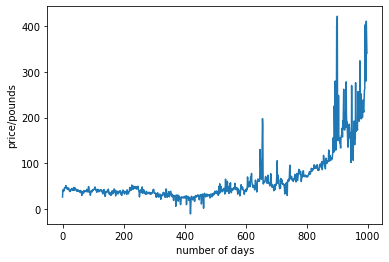

In [37]:
#get the averge spread 
plt.plot(day_price)
plt.xlabel('number of days')
plt.ylabel('price/pounds')
print(day[0])
print(len(day))

From March 31th of 2019, price is kept around 50 pounds after approximately 450 days, the price gradually growed in the following 550 days, except peaks at around day 625, day 900, and day 990.

In [5]:
# define a function computing daily average so that we could apply to other dataset
def calculate_day_average(data, date_index_name, price_name):
    #produce a column representing specific day for each row
    data[date_index_name] = pd.to_datetime(data[date_index_name])
    data['day'] = data[date_index_name].dt.day
    data['month'] = data[date_index_name].dt.month
    data['year'] = data[date_index_name].dt.year

    cols = ['day', 'month', 'year']
    data['year_month_day'] = data[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

    daily_price = []
    day = []
    dmy_index = data['year_month_day'].unique()
    for item in dmy_index:
        daily_price.append(
            sum(data[data['year_month_day']==item].loc[:, price_name])/len(data[data['year_month_day']==item].loc[:, price_name]) #compute average of one day
        ) #compute the average price of a day

        day.append(item)
    return daily_price, day

# Detecting outliers using Interquatile Range (IQR)
- This is the easiest thing to do, giving us a glimsp of the result.

In [6]:
def extreme(data, years, date_name):
    data[date_name] = pd.to_datetime(data[date_name])
    data["year"] = data[date_name].dt.year
    data_new = data[data["year"].isin([years])]
    data_new[date_name] = data_new[date_name].dt.strftime('%Y-%m-%d')
    
    # IQR
    Q1 = np.percentile(data_new['apx_da_hourly'], 25,
                   interpolation = 'midpoint')
 
    Q3 = np.percentile(data_new['apx_da_hourly'], 75,
                   interpolation = 'midpoint')
    IQR = Q3 - Q1
    upper = Q3+1.5*IQR
    lower = Q1-1.5*IQR
    indexU = np.where(data_new['apx_da_hourly']>upper) # index for upper values
    indexL = np.where(data_new['apx_da_hourly']<lower) #index for lower
    dayval = []
    
    # append the outlier values
    for item in indexU[0]:
        dayval.append(
            [data_new.iloc[item, 0],data_new.iloc[item, 1]]
        )
    for item in indexL[0]:
        dayval.append(
            [data_new.iloc[item, 0],data_new.iloc[item, 1]]
        )
    return dayval

In [7]:
#extreme days for each year, e,g,2020
extreme(epex,2020,'timestamp')


<ipython-input-6-d01d9fad601f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new[date_name] = data_new[date_name].dt.strftime('%Y-%m-%d')


[['2020-03-04', 67.48],
 ['2020-03-04', 67.48],
 ['2020-03-04', 93.0],
 ['2020-03-04', 93.0],
 ['2020-03-04', 70.0],
 ['2020-03-04', 70.0],
 ['2020-03-05', 99.9],
 ['2020-03-05', 99.9],
 ['2020-03-05', 71.97],
 ['2020-03-05', 71.97],
 ['2020-03-06', 92.0],
 ['2020-03-06', 92.0],
 ['2020-03-08', 66.72],
 ['2020-03-08', 66.72],
 ['2020-03-13', 75.0],
 ['2020-03-13', 75.0],
 ['2020-03-19', 86.6],
 ['2020-03-19', 86.6],
 ['2020-08-24', 81.93],
 ['2020-08-24', 81.93],
 ['2020-08-24', 87.01],
 ['2020-08-24', 87.01],
 ['2020-08-24', 68.5],
 ['2020-08-24', 68.5],
 ['2020-08-26', 74.99],
 ['2020-08-26', 74.99],
 ['2020-08-26', 68.6],
 ['2020-08-26', 68.6],
 ['2020-08-26', 74.3],
 ['2020-08-26', 74.3],
 ['2020-08-27', 69.5],
 ['2020-08-27', 69.5],
 ['2020-08-27', 69.3],
 ['2020-08-27', 69.3],
 ['2020-08-27', 99.4],
 ['2020-08-27', 99.4],
 ['2020-08-27', 89.94],
 ['2020-08-27', 89.94],
 ['2020-08-27', 83.36],
 ['2020-08-27', 83.36],
 ['2020-08-31', 66.05],
 ['2020-08-31', 66.05],
 ['2020-08-31', 

In [8]:
#compare market prices
sip.head()

,timestamp,SP,spot_price
0,2019-01-02 00:00:00+00:00,1.0,40.01
1,2019-01-02 00:30:00+00:00,2.0,43.27
2,2019-01-02 01:00:00+00:00,3.0,42.72
3,2019-01-02 01:30:00+00:00,4.0,52.17
4,2019-01-02 02:00:00+00:00,5.0,53.44


In [9]:
sysP.head()
sysP.columns[3]

'System Buy Price(£/MWh)'

# Compare different systems of pricing
1. obtaining timescale that all three datasets share
2. create three new datasets sharing the same timescale
3. check normality of the price to determine the hypothesis test

In [29]:
#average price of each day sip
sipDP, sipDay = calculate_day_average(sip, 'timestamp', 'spot_price')


In [30]:
#average value of each day of symP
symPDP, symPDay = calculate_day_average(sysP, 'Settlement Date', sysP.columns[3])


In [13]:
#average value of each day of epex
epexDP, epexD = calculate_day_average(epex, 'timestamp', epex.columns[1])

In [14]:
# obtaining same date
range_date = [[epexD[0], sipDay[0], symPDay[0]], [epexD[len(epexD)-1], sipDay[len(sipDay)-1], symPDay[len(symPDay)-1]]]
print(range_date)

[['31_3_2019', '2_1_2019', '4_8_2019'], ['22_12_2021', '16_12_2021', '15_12_2021']]


In [15]:
overlap_range = ['4_8_2019', '15_12_2021']
def aligned(dp, day, overlap_range):
    dayn = np.array(day)
    index = []
    for i in range(len(day)):
        if day[i] == overlap_range[0]:
            index.append(i)
        if day[i] == overlap_range[1]:
            index.append(i)
    new_df = pd.DataFrame(dp[index[0]:index[1]], day[index[0]:index[1]])
    return new_df

In [16]:
alepex = aligned(epexDP, epexD, overlap_range)
alepex.head()

,0
4_8_2019,41.865417
5_8_2019,40.042500
6_8_2019,40.860833
7_8_2019,38.316250
8_8_2019,38.250000


In [17]:
alsym = aligned(symPDP, symPDay, overlap_range)
alsip = aligned(sipDP, sipDay, overlap_range)

(array([589., 164.,  67.,  10.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([-13.59895833,  66.13841667, 145.87579167, 225.61316667,
        305.35054167, 385.08791667, 464.82529167, 544.56266667,
        624.30004167, 704.03741667, 783.77479167]),
 <BarContainer object of 10 artists>)

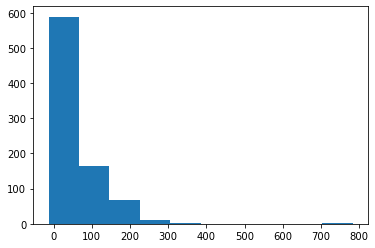

In [18]:
#correlation
plt.hist(alsip[0])# not normal distribution

(array([183., 472., 102.,  36.,  41.,  17.,   9.,   1.,   1.,   2.]),
 array([-10.58916667,  32.64266667,  75.8745    , 119.10633333,
        162.33816667, 205.57      , 248.80183333, 292.03366667,
        335.2655    , 378.49733333, 421.72916667]),
 <BarContainer object of 10 artists>)

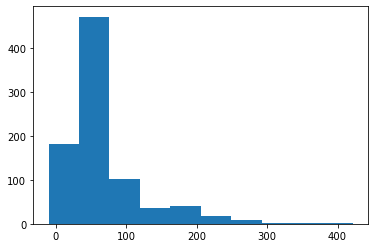

In [19]:
plt.hist(alepex)# not normal distribution

(array([774., 168.,  34.,   4.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([-16.91110354,  80.80360592, 178.51831537, 276.23302483,
        373.94773429, 471.66244375, 569.37715321, 667.09186267,
        764.80657213, 862.52128158, 960.23599104]),
 <BarContainer object of 10 artists>)

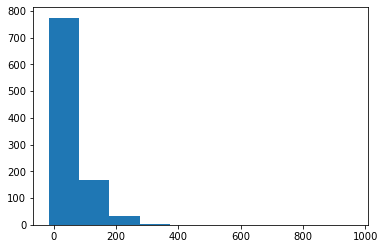

In [20]:
plt.hist(alsym) # not normal distribution

- All shows non-normality, therefore using spearman correlation test

In [21]:
alepex[0].corr(alsym[0], method='spearman') # spearman correlation epex v.s. sym

0.8169342612519072

In [22]:
alepex[0].corr(alsip[0], method='spearman') #spearman correlation epex v.s. sip

0.9587328266491267

In [23]:
alsip[0].corr(alsym[0], method='spearman') #spearman correlation sip v.s. sym

0.854473225198895

# Seasonality
- Seasonality uses autocorrelation

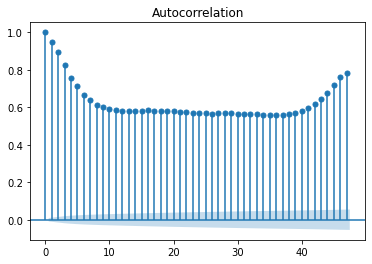

In [24]:
#seasonality

from statsmodels.graphics.tsaplots import plot_acf
epex = epex[['timestamp', 'apx_da_hourly']].set_index(['timestamp'])

#plot autocorrelation
plot_acf(epex.apx_da_hourly)
plt.show() #no seasonality

- there is no periodic change using autocorrelation between prices of different timesteps, possibly due to the general increases in prices over the years
- we compute the difference in prices between prices of a particular time piont and the next time point，assuming that there is no big changes in small temporal window.
- And then we uses these differences to perform autocorrelation

In [33]:
# difference in prices between prices of a particular time piont and the next time point
first_diffs = epex.apx_da_hourly.values[1:] - epex.apx_da_hourly.values[:-1] 
epex['PriceDiffs'] = np.concatenate([first_diffs, [0]])
epex.drop(epex[epex.PriceDiffs == 0].index, inplace=True)

In [34]:
epex.head()

,apx_da_hourly,PriceDiffs
timestamp,,
2019-03-31 23:30:00+00:00,26.43,2.81
2019-04-01 00:30:00+00:00,29.24,5.86
2019-04-01 01:30:00+00:00,35.10,-4.19
2019-04-01 02:30:00+00:00,30.91,1.35
2019-04-01 03:30:00+00:00,32.26,8.26


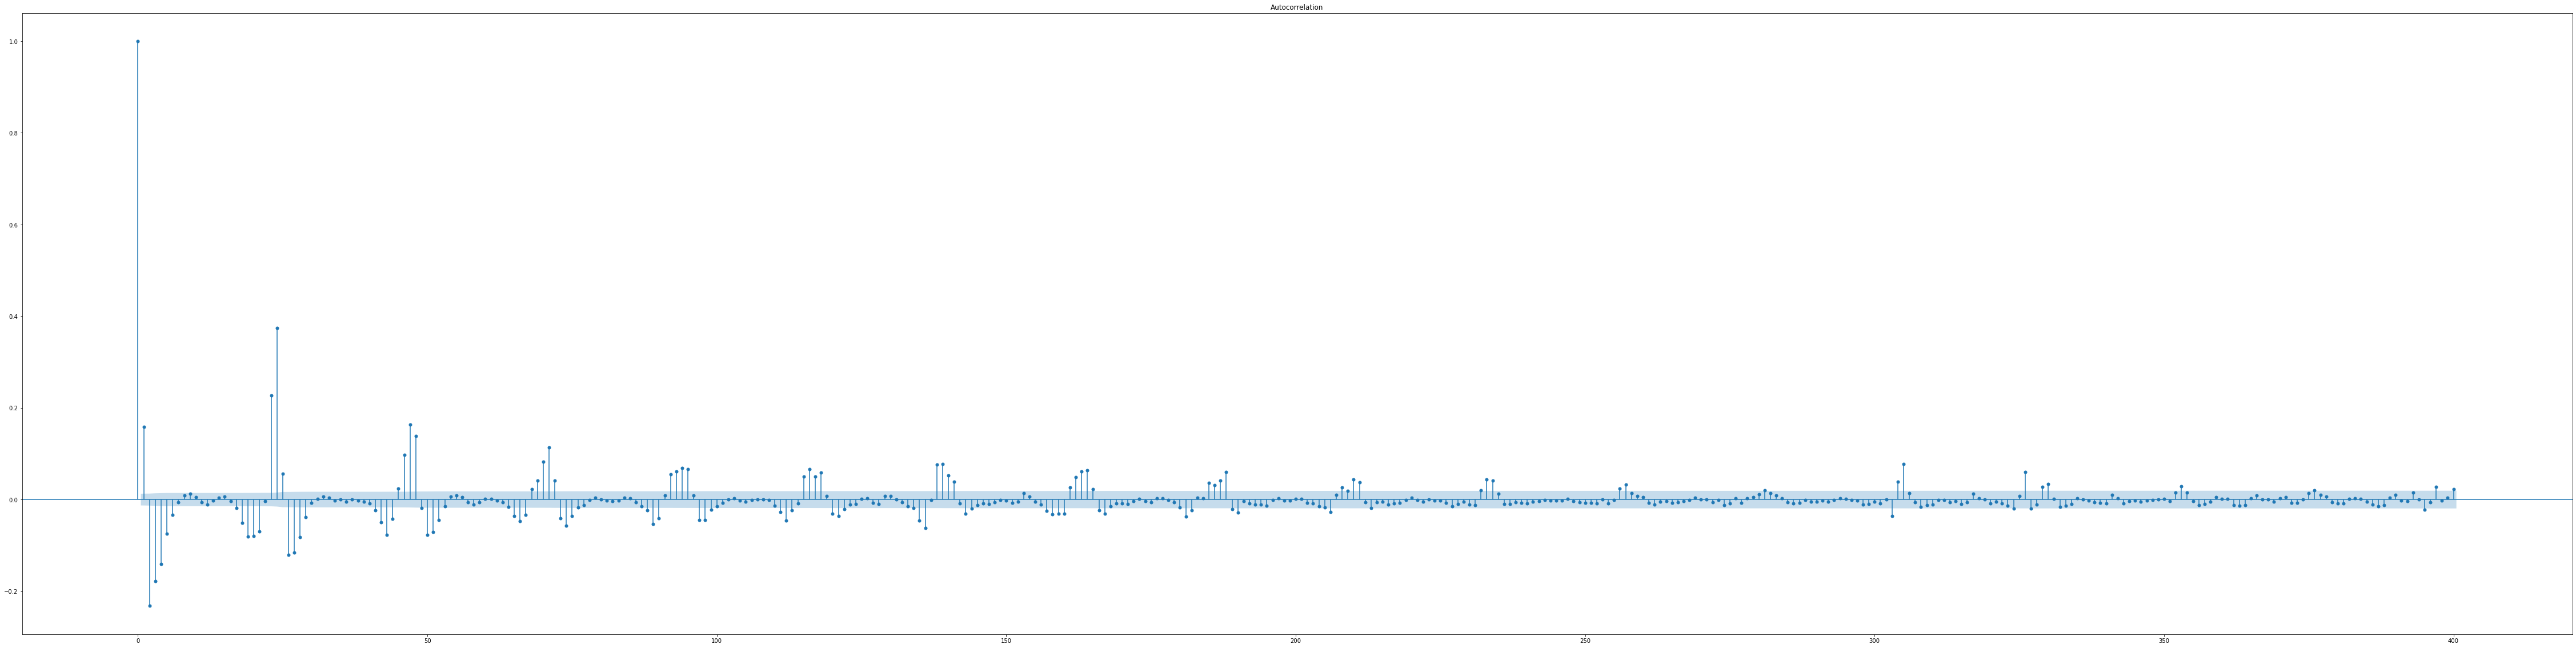

In [27]:
from statsmodels.graphics.tsaplots import plot_pacf
fig, ax = plt.subplots(figsize=(80, 20))
plot_acf(epex.PriceDiffs, lags=400, ax=ax) #autocorrelation 
plt.show() #showed weak correlation and periodicity

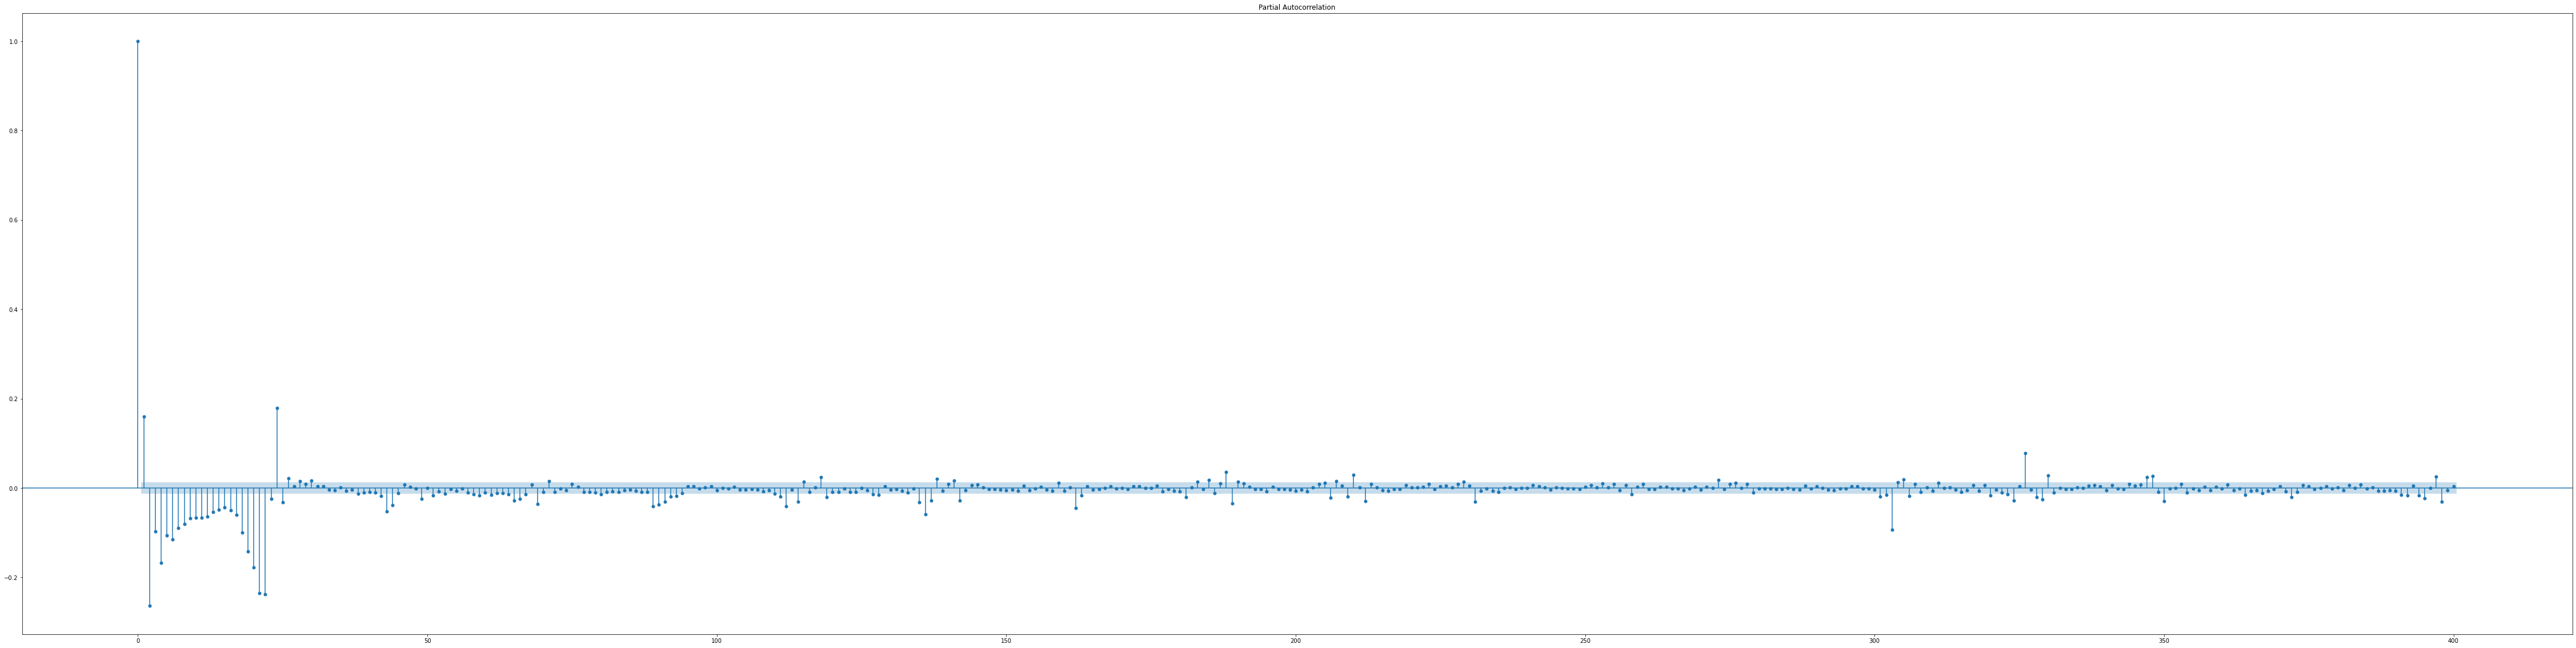

In [28]:
fig, ax = plt.subplots(figsize=(80, 20))
plot_pacf(epex.PriceDiffs, lags=400, ax=ax) #trying partial autocorrelation but no improvment
plt.show()

- Autocorrelation analysis showed there is weak and decaying periodicity as lags inreases. However, it is not necessary that it indicates there is a role of seasonality in determining electricity prices